In [5]:
from segment import *
from circle_fit import *
import matplotlib.pyplot as plt
from astropy.time import Time
import multiprocessing as mp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import cv2
import datetime
import pandas as pd
import numpy as np

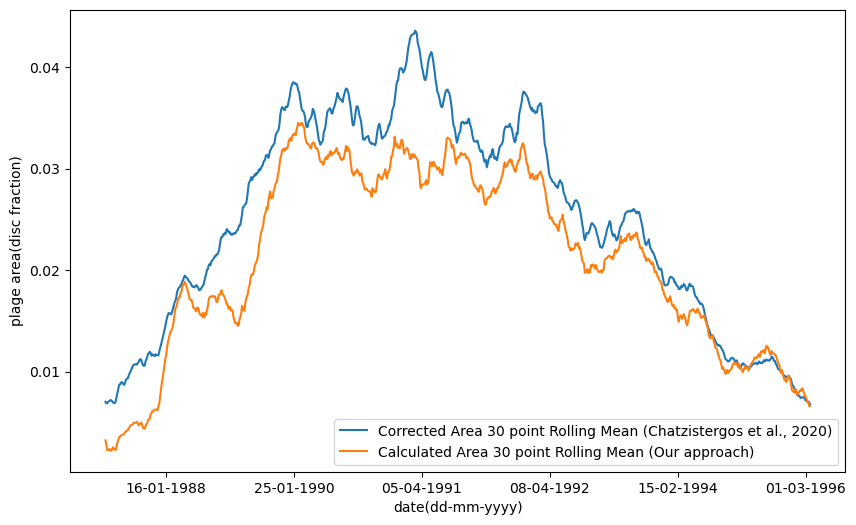

In [6]:
df = pd.read_csv('./area_stats.csv')
#df = df.set_index('date')

rolling_window_size = 30
df['corrected_area_rolling_mean'] = df['corrected_area'].rolling(rolling_window_size).mean()
df['calculated_area_rolling_mean'] = df['calculated_area'].rolling(rolling_window_size).mean()

# plot the original time series and the moving average time series
#plt.plot(df['corrected_area'], label='Corrected Area')
plt.figure(figsize=(10,6))
plt.plot(df['corrected_area_rolling_mean'], label='Corrected Area {} point Rolling Mean (Chatzistergos et al., 2020)'.format(rolling_window_size))
#plt.plot(df['calculated_area'], label='Calculated Area')
plt.plot(df['calculated_area_rolling_mean'], label='Calculated Area {} point Rolling Mean (Our approach)'.format(rolling_window_size))
x_axis_ticks = np.arange(100, len(df), 150)
x_axis_labels = df["date"].iloc[x_axis_ticks]
plt.xticks(x_axis_ticks, x_axis_labels)
plt.xlabel('date(dd-mm-yyyy)')
plt.ylabel('plage area(disc fraction)')
plt.legend()
plt.show()

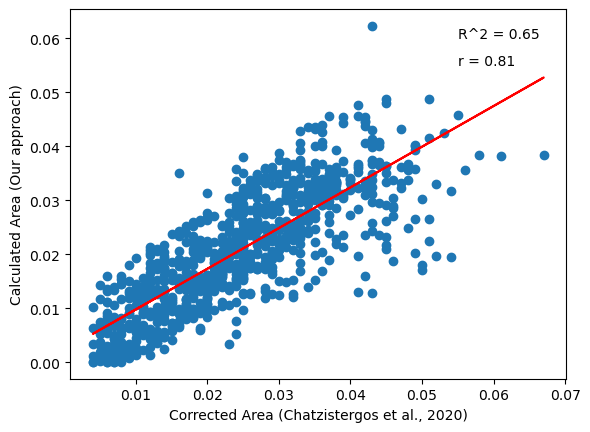

In [7]:
# Extract the corrected_area and calculated_area columns as X and Y
X = df['corrected_area'].values.reshape(-1, 1)
Y = df['calculated_area'].values.reshape(-1, 1)

# Fit a linear regression model to the data
reg = LinearRegression().fit(X, Y)

# Predict the values of Y using the linear regression model
Y_pred = reg.predict(X)

# Calculate the R^2 score
r2 = r2_score(Y, Y_pred)

# Calculate the correlation coefficient
corr = np.corrcoef(X.reshape(-1), Y.reshape(-1))[0, 1]

# Plot the scatter plot
plt.scatter(X, Y)

# Plot the regression line
plt.plot(X, Y_pred, color='red')

# Add the R^2 value and the correlation coefficient to the plot
plt.text(0.055, 0.06, 'R^2 = {:.2f}'.format(r2), fontsize=10)
plt.text(0.055, 0.055, 'r = {:.2f}'.format(corr), fontsize=10)

# Set the x and y axis labels
plt.xlabel("Corrected Area (Chatzistergos et al., 2020)")
plt.ylabel("Calculated Area (Our approach)")

# Show the plot
plt.show()

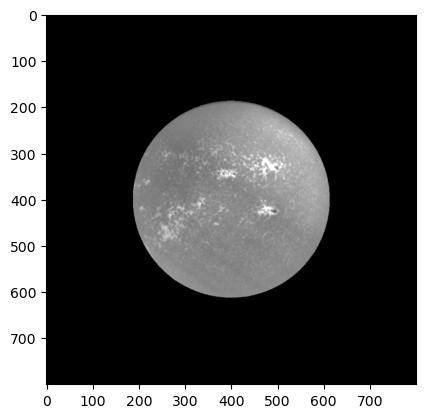

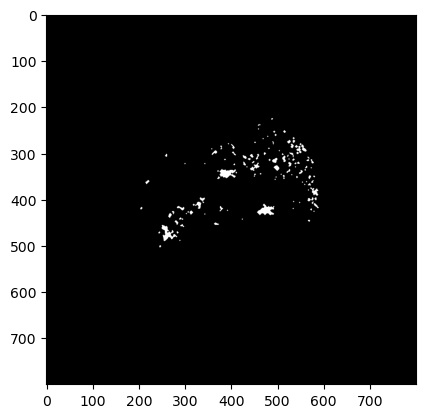

0.034 0.030233147473460065


In [8]:
corrected_area, cal_area, input_image, output_image  = algorithm(input_file = './images/CAK_19910405T020600_Q1L1b800px.jpg', thresh = 170, clip_limit=2, area_thresh = 1000)
plt.imshow(input_image, cmap='gray')
plt.show()
plt.imshow(output_image, cmap='gray')
plt.show()
print(corrected_area, cal_area)